<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_PyTorchCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

#**Convolution**

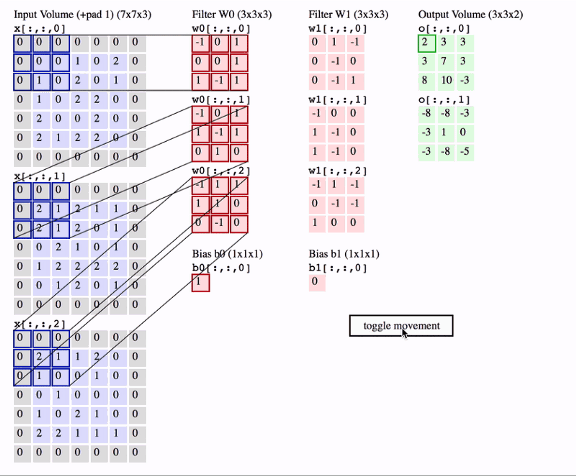

#**Data loading**

In [2]:
import torchvision
import torchvision.transforms as transforms

trainset = torchvision.datasets.CIFAR10(root='./data', train= True,
                                        download= True,
                                        transform= transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle= True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
2


#**Visualise data**

In [6]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


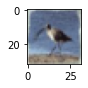

In [9]:
plt.figure(figsize= (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
  def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

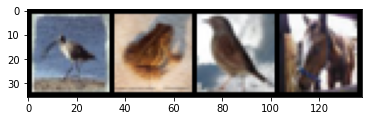

bird frog bird horse


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

#**Single Convolutional layer**

In [12]:
import torch.nn as nn
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3) # padding= (1,1), stride= (2,1)
  
  def forward(self, x):
    x = self.conv1(x)
    return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

In [15]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(30, 30)


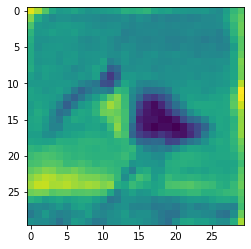

In [17]:
plt.imshow(out1)
plt.show()

#**Deep CNN**

In [18]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),   #(N, 3, 32, 32) --> (N, 8, 30, 30)
        nn.Conv2d(8, 16, 3)   #(N, 8, 30, 30) --> (N, 16, 28, 28)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [19]:
net = FirstCNN_v2()
out = net(images)
print(out.shape)

torch.Size([4, 16, 28, 28])


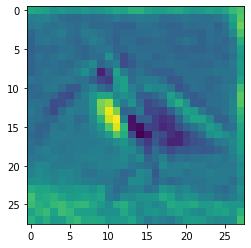

In [20]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [21]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) --> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2),   # (N, 6, 30, 30) --> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),          # (N, 6, 14, 14) --> (N, 16, 10, 10)
        nn.AvgPool2d(2, stride=2)   # (N, 16, 10, 10) --> (N, 16, 5, 5)
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [22]:
net = FirstCNN_v3()
out = net(images)
print(out.shape)

torch.Size([4, 16, 5, 5])


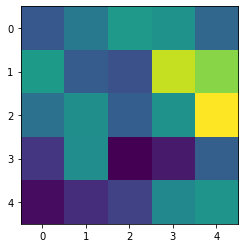

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

#**LeNet**

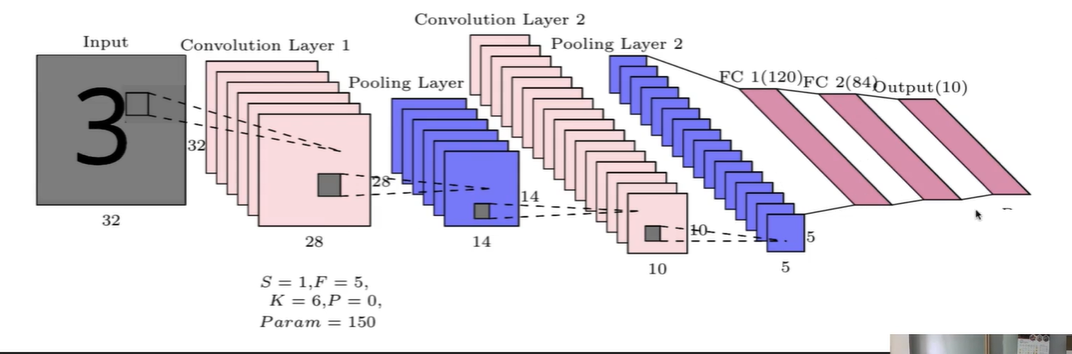

In [24]:
class leNet(nn.Module):
  def __init__(self):
    super(leNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),           # (N, 3, 32, 32) --> (N, 6, 28, 28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),    # (N, 6, 28, 28) --> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),          # (N, 6, 14, 14) --> (N, 16, 10, 10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)     # (N, 16, 10, 10) --> (n, 16, 5, 5)
    )
    
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),          # (N, 400) --> (N, 120)
        nn.Tanh(),
        nn.Linear(120, 84),           # (N, 120) --> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10)             # (N, 84) --> (N, 10)
    )

  def forward(self, x):
    #print(x.shape)
    x = self.cnn_model(x)
    #print(x.shape)
    x = x.view(x.shape[0], -1)
    #print(x.shape)
    x = self.fc_model(x)
    #print(x.shape)
    return x


In [25]:
net = leNet()
out = net(images)

In [26]:
print(out)

tensor([[ 0.1070,  0.0447, -0.1554, -0.0400,  0.1146,  0.0485,  0.0085,  0.0378,
         -0.0750, -0.0572],
        [ 0.1242,  0.0425, -0.1554, -0.0479,  0.1302,  0.0553, -0.0116,  0.0519,
         -0.0835, -0.0380],
        [ 0.1051,  0.0316, -0.1554, -0.0475,  0.1235,  0.0494, -0.0140,  0.0547,
         -0.0856, -0.0407],
        [ 0.1089,  0.0335, -0.1695, -0.0530,  0.1142,  0.0615, -0.0065,  0.0412,
         -0.0866, -0.0444]], grad_fn=<AddmmBackward>)


In [27]:
print(out.data)

tensor([[ 0.1070,  0.0447, -0.1554, -0.0400,  0.1146,  0.0485,  0.0085,  0.0378,
         -0.0750, -0.0572],
        [ 0.1242,  0.0425, -0.1554, -0.0479,  0.1302,  0.0553, -0.0116,  0.0519,
         -0.0835, -0.0380],
        [ 0.1051,  0.0316, -0.1554, -0.0475,  0.1235,  0.0494, -0.0140,  0.0547,
         -0.0856, -0.0407],
        [ 0.1089,  0.0335, -0.1695, -0.0530,  0.1142,  0.0615, -0.0065,  0.0412,
         -0.0866, -0.0444]])


In [28]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([4, 4, 4, 4])


In [29]:
batch_size = 120

trainset = torchvision.datasets.CIFAR10(root='./data', train= True, download= True, transform= transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train= False, download= True, transform= transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
  def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
      input, labels = data
      output = net(input)
      _, pred = torch.max(output.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    return (correct / total)*100

In [31]:
net = leNet()

In [32]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 37.92, Train acc: 38.55
Epoch: 1/16, Test acc: 42.84, Train acc: 42.88
Epoch: 2/16, Test acc: 46.39, Train acc: 46.75
Epoch: 3/16, Test acc: 48.54, Train acc: 49.72
Epoch: 4/16, Test acc: 51.39, Train acc: 53.57
Epoch: 5/16, Test acc: 52.12, Train acc: 54.87
Epoch: 6/16, Test acc: 53.15, Train acc: 56.67
Epoch: 7/16, Test acc: 53.08, Train acc: 57.36
Epoch: 8/16, Test acc: 54.70, Train acc: 59.62
Epoch: 9/16, Test acc: 54.23, Train acc: 59.87
Epoch: 10/16, Test acc: 55.33, Train acc: 62.11
Epoch: 11/16, Test acc: 55.20, Train acc: 62.26
Epoch: 12/16, Test acc: 55.22, Train acc: 63.47
Epoch: 13/16, Test acc: 54.36, Train acc: 63.01
Epoch: 14/16, Test acc: 54.72, Train acc: 64.69
Epoch: 15/16, Test acc: 55.15, Train acc: 65.15


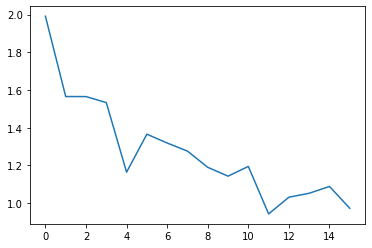

CPU times: user 6min 25s, sys: 2.63 s, total: 6min 27s
Wall time: 6min 28s


In [33]:
%%time
max_epochs = 16
loss_arr = []
loss_epoch_arr = []

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    input, labels = data

    opt.zero_grad()

    outputs = net(input)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' %(epoch,max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

#**Move to GPU**

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [35]:
  def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
      input, labels = data
      input, labels = input.to(device), labels.to(device)
      output = net(input)
      _, pred = torch.max(output.data, 1)
      total += labels.size(0)
      correct += (pred == labels).sum().item()
    return (correct / total)*100

In [36]:
net = leNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/128, Test acc: 51.15, Train acc: 53.48
Epoch: 1/128, Test acc: 52.49, Train acc: 54.99
Epoch: 2/128, Test acc: 53.33, Train acc: 56.30
Epoch: 3/128, Test acc: 53.47, Train acc: 57.92
Epoch: 4/128, Test acc: 53.25, Train acc: 57.65
Epoch: 5/128, Test acc: 54.74, Train acc: 59.91
Epoch: 6/128, Test acc: 55.27, Train acc: 61.60
Epoch: 7/128, Test acc: 53.71, Train acc: 59.70
Epoch: 8/128, Test acc: 54.41, Train acc: 61.93
Epoch: 9/128, Test acc: 56.00, Train acc: 63.98
Epoch: 10/128, Test acc: 56.46, Train acc: 64.94
Epoch: 11/128, Test acc: 55.96, Train acc: 64.48
Epoch: 12/128, Test acc: 55.63, Train acc: 64.81
Epoch: 13/128, Test acc: 56.31, Train acc: 66.69
Epoch: 14/128, Test acc: 56.37, Train acc: 67.60
Epoch: 15/128, Test acc: 55.96, Train acc: 68.13
Epoch: 16/128, Test acc: 56.19, Train acc: 68.93
Epoch: 17/128, Test acc: 55.17, Train acc: 68.31
Epoch: 18/128, Test acc: 55.64, Train acc: 68.81
Epoch: 19/128, Test acc: 55.43, Train acc: 70.07
Epoch: 20/128, Test acc: 55.84

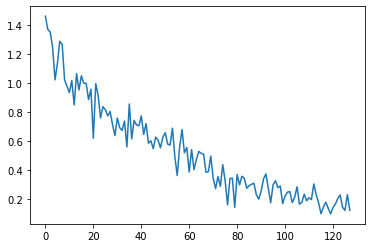

CPU times: user 24min 21s, sys: 6.16 s, total: 24min 27s
Wall time: 24min 29s


In [39]:
%%time
max_epochs = 128
loss_arr = []
loss_epoch_arr = []

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    input, labels = data
    input, labels = input.to(device), labels.to(device)

    opt.zero_grad()

    outputs = net(input)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())
  
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' %(epoch,max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()